In [2]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt
from pybinding.repository import graphene
from math import pi, sqrt

pb.pltutils.use_style()
%matplotlib inline

In [3]:
def vacancy(position, radius):
    @pb.site_state_modifier
    def modifier(state, x, y):
        x0, y0 = position
        state[(x-x0)**2 + (y-y0)**2 < radius**2] = False
        return state
    return modifier

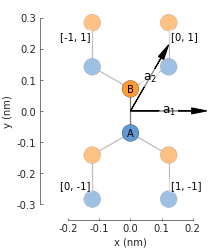

In [4]:
def monolayer_graphene():
    a = 0.24595   # [nm] unit cell length
    a_cc = 0.142  # [nm] carbon-carbon distance
    t = -2.8      # [eV] nearest neighbour hopping

    lat = pb.Lattice(a1=[a, 0],
                     a2=[a/2, a/2 * sqrt(3)])
    lat.add_sublattices(('A', [0, -a_cc/2]),
                        ('B', [0,  a_cc/2]))
    lat.add_hoppings(
        # inside the main cell
        ([0,  0], 'A', 'B', t),
        # between neighboring cells
        ([1, -1], 'A', 'B', t),
        ([0, -1], 'A', 'B', t)
    )
    return lat

lattice = monolayer_graphene()
lattice.plot()
plt.show()

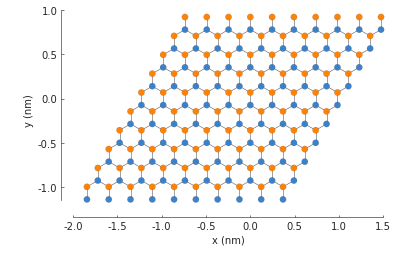

In [5]:

cellSize = 10

model = pb.Model(
    monolayer_graphene(),
    #graphene.monolayer_4atom(),
    #pb.rectangle(2),
    #pb.translational_symmetry(a1=2,a2=2),
    pb.primitive(a1=cellSize,a2=cellSize),
    pb.translational_symmetry(a1=cellSize*0.246,a2=cellSize*0.246),
    #pb.translational_symmetry(),
    #model.lattice.plot_vectors(position=[0.6, -0.25])
   # vacancy(position=[0, 0.5], radius=0.1),
    #vacancy(position=[ 0.50,  0.45], radius=0.2),
    #vacancy(position=[ -0.50,  -0.45], radius=0.1)    
    
    
)
model.plot(num_periods=0)
model.lattice.plot_vectors(position=[3.0, -2.0])

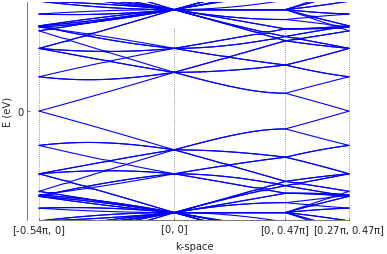

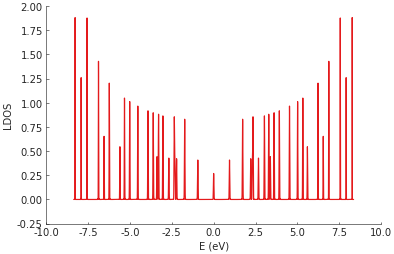

In [5]:
#band structure

solver = pb.solver.lapack(model) # only the 10 lowest states

a_cc = graphene.a_cc
a = graphene.a_cc * sqrt(3)
Gamma = [0, 0]
K1 = [-4*pi / (3*sqrt(3)*a_cc*cellSize), 0]
M = [0, 2*pi / (3*a_cc*cellSize)]
K2 = [2*pi / (3*sqrt(3)*a_cc*cellSize), 2*pi / (3*a_cc*cellSize)]


bands = solver.calc_bands(K1, Gamma, M, K2)
bands.plot(linestyle='-',color='b')
plt.ylim(-3,3)
plt.show()

kpm = pb.kpm(model)

ldos = kpm.calc_ldos(energy=np.linspace(-10, 10, 5000), broadening=0.015, position=[0, 0])
ldos.plot()
plt.show()


2681


[]

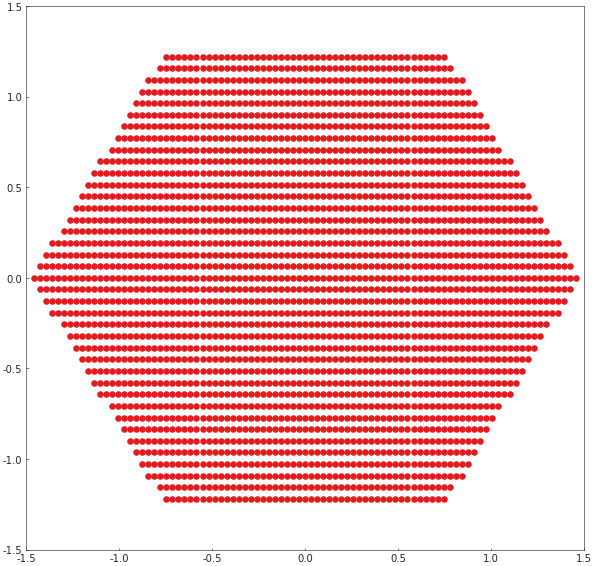

In [6]:


#kd  = (4*pi/3)  # dirac point
a = cellSize*graphene.a
b=2*np.pi/(a) #Reciprocal lattice vector

nn = 20#ncrease this value to increase the sampling of K-points in BZ
pp = 4*nn

nnx = int(round(pp*2/np.sqrt(3)))
ddnx = (2*b/np.sqrt(3))/nnx

nny = int(pp)
ddny = b/nny;

kx1 = np.linspace((-b/np.sqrt(3))-ddnx/2,(b/np.sqrt(3))+ddnx/2,nnx+1)
ky1 = np.linspace(-b-ddny/2,b+ddny/2,nny+1)

bb = b
kk1 = 0

temp1 = np.zeros((round((nnx*nny)*(3/8)),2))
for ii in range (0,nnx):
    for jj in range (0,nny):
        kx = kx1[ii]
        ky = ky1[jj]
        if ((np.sqrt(3)*kx-b)<=ky and (ky<=(-np.sqrt(3)*kx+b)   # this condition make the hexagonal shape
            and (np.sqrt(3)*kx+b)>=ky) and (ky>=-np.sqrt(3)*kx-b)
            and (-b/2<=ky) and (ky<=b/2)):
            kk1 =kk1+1
            temp1[kk1,0] = kx
            temp1[kk1,1] = ky    
            
print(kk1)
#print (temp1)
sample = temp1[0:kk1+1,:] # for nn = 2: 21, nn = 3: 
#print (temp1.shape[0])  # print the number of column
#print (sample)
kx=sample[:,0]
ky=sample[:,1]

plt.figure(figsize=(10,10))
plt.scatter(kx,ky,s=30)
plt.plot()

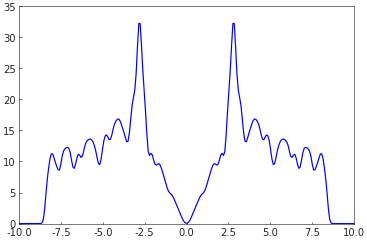

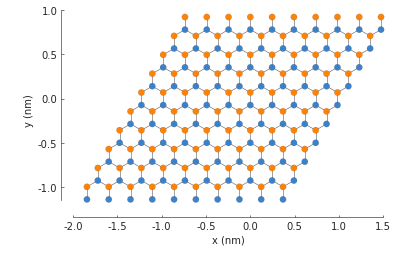

In [7]:
E = 10

#solver.set_wave_vector([0,0])
#lapack_dos = solver.calc_dos(np.linspace(-E, E, 2500), broadening=0.01)
#data2=lapack_dos.data
data2 = 0
for i in range(0,kk1):
    #print(i)
    solver = pb.solver.lapack(model)
    solver.set_wave_vector([kx[i],ky[i]])
    lapack_dos = solver.calc_dos(np.linspace(-E, E, 250), broadening=0.1)##########too large(2500,0.01)
    data2+=lapack_dos.data
data2=data2/(kk1+1)
#plt.plot(data2, np.linspace(-9, 9, 2500),label='position: [4.5,3]',color='b')
plt.plot(np.linspace(-E, E, 250),data2,label='position: [4.5,3]',color='b')
#plt.axvline(-0.02)
#plt.axvline(-0.01)
#plt.ylim(0,10)
model = pb.Model(
    monolayer_graphene(),
    #graphene.monolayer_4atom(),
    #pb.rectangle(2),
    #pb.translational_symmetry(a1=2,a2=2),
    pb.primitive(a1=cellSize,a2=cellSize),
    pb.translational_symmetry(a1=cellSize*0.246,a2=cellSize*0.246),
    #pb.translational_symmetry(),
    #model.lattice.plot_vectors(position=[0.6, -0.25])
    #vacancy(position=[0, 0.5], radius=0.1),
    #vacancy(position=[ 0.50,  0.45], radius=0.2),
    #vacancy(position=[ -0.50,  -0.45], radius=0.1)    
    
    
)
plt.figure()
model.plot(num_periods=0)
model.lattice.plot_vectors(position=[3.0, -2.0])





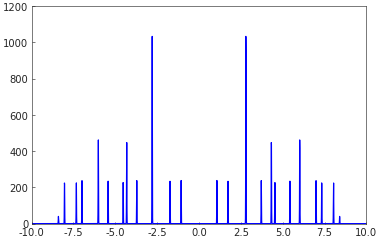

In [10]:
solver.set_wave_vector([0,0])
lapack_dos = solver.calc_dos(np.linspace(-E, E, 2500), broadening=0.01)
data2=lapack_dos.data

plt.plot(np.linspace(-E, E, 2500),data2,label='position: [4.5,3]',color='b')
#plt.axvline(-0.02)
#plt.axvline(-0.01)

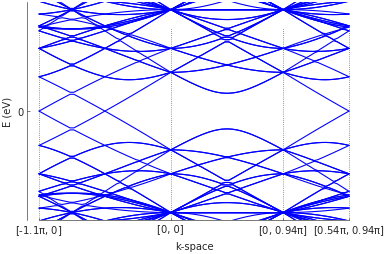

In [9]:
solver = pb.solver.lapack(model) # only the 10 lowest states

a_cc = graphene.a_cc
a = graphene.a_cc * sqrt(3)

Gamma = [0, 0]
K1 = [-4*pi / (3*sqrt(3)*a_cc*5), 0]
M = [0, 2*pi / (3*a_cc*5)]
K2 = [2*pi / (3*sqrt(3)*a_cc*5), 2*pi / (3*a_cc*5)]


bands = solver.calc_bands(K1, Gamma, M, K2)
bands.plot(linestyle='-',color='b')
plt.ylim(-3,3)
plt.show()